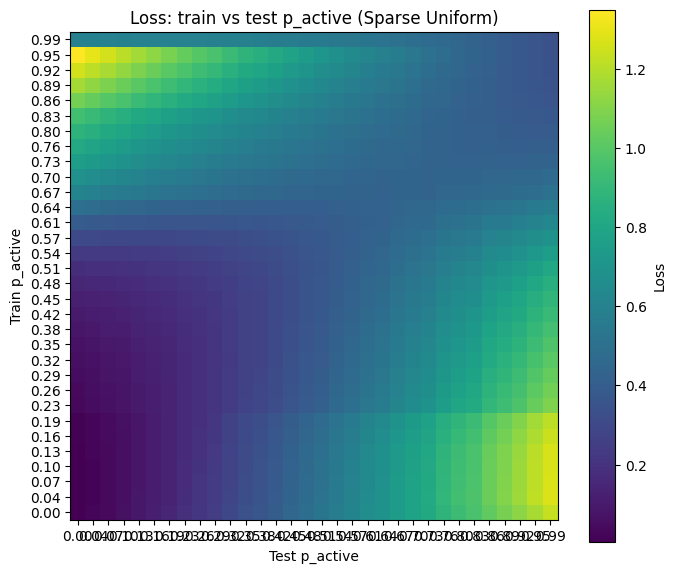

In [1]:
import torch
from occhio import ToyModel
from occhio.examples.density_sweep import n_features
from occhio.model_grid import ModelGrid, Axis
from occhio.autoencoder import TiedLinearRelu
from occhio.distributions import CorrelatedPairs, HierarchicalPairs, SparseUniform
from occhio.visualization.phase_change import plot_phase_change
from occhio.visualization.export import export_figure
from occhio.visualization.phase_change import plot_phase_change_multi

In [2]:
generator = torch.Generator("cpu").manual_seed(42)

In [3]:
N_FEATURES = 2
N_HIDDEN = 1
P_INDIVIDUAL = 1
P_FOLLOW = 1
DATA = "hierarchical"
EXPERIMENT_SIZE = 24

In [4]:
relative_importances = torch.logspace(-1, 1, EXPERIMENT_SIZE)
densities = torch.logspace(0, -2, EXPERIMENT_SIZE)

In [5]:
# [12.02.26 | OliverSieweke] TODO: too much indirection
def model_trainer(relative_importance, density):
    model = ToyModel(
        distribution=HierarchicalPairs(
            N_FEATURES, p_active=density, p_follow=P_FOLLOW, generator=generator
        ),
        ae=TiedLinearRelu(N_FEATURES, N_HIDDEN, generator=generator),
        importances=relative_importance ** torch.arange(N_FEATURES),
    )
    model.fit(n_epochs=32000)
    return model


model_grid = ModelGrid(
    model_trainer,
    x_axis=Axis("Relative Importance", relative_importances),
    y_axis=Axis("Density", densities),
)

Training Model Grid: 100%|██████████| 576/576 [52:11<00:00,  5.44s/model]


In [6]:
fig = plot_phase_change(model_grid, tracked_feature=0)

In [7]:
fig.show()

In [8]:
plot_phase_change_multi(model_grid, up_to=10)

IndexError: index 2 is out of bounds for axis 2 with size 2

In [ ]:
export_figure(
    fig,
    # {"data": DATA, "n_hidden": N_HIDDEN},
    # {"data": DATA, "p_individual": P_INDIVIDUAL, "n_hidden": N_HIDDEN},
    {
        "data": DATA,
        "p_follow": P_FOLLOW,
        "n_hidden": N_HIDDEN,
        "n_features": N_FEATURES,
    },
    subdir="phase-changes",
)